<a href="https://colab.research.google.com/github/Thatphol/Cluster-Analyst-Python/blob/main/Custumer_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mall Customer data analysis

ref = https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import pandas as pd
import numpy as np
from numpy import random as np_random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Frist : Explor data using
*   info
*   isnull
*   describe
*   shape


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape

(200, 5)

จากการสำรวจจะพบว่า ข้อมูลต่าง ๆ นั้นไม่มีค่าว่าง และ Type ของข้อมูลนั้นถูกต้องทำให้ไม่ต้องทำการเปลี่ยนแปลง

ต่อไปเริ่มทำการ Quick analysis ด้วย Value counts

<Axes: >

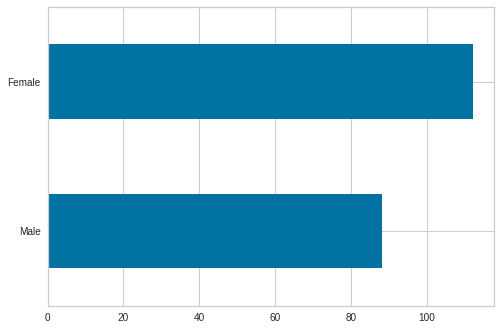

In [ ]:
df['Gender'].value_counts(sort=False).plot(kind='barh')
# เนื่องจากคอลลัมม์ Gender มีแค่ชายกับหญิงจึงไม่นำไปทำ Displot

<Figure size 576x396 with 0 Axes>

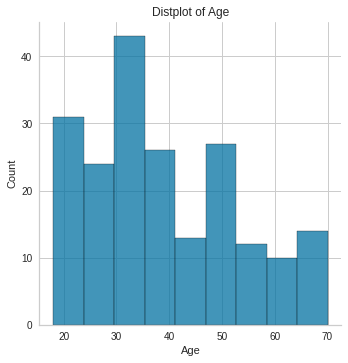

<Figure size 576x396 with 0 Axes>

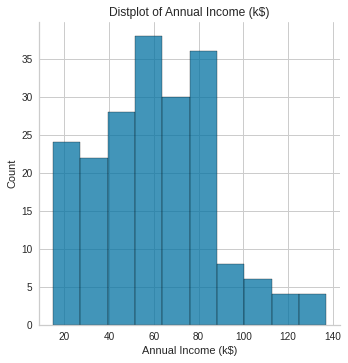

<Figure size 576x396 with 0 Axes>

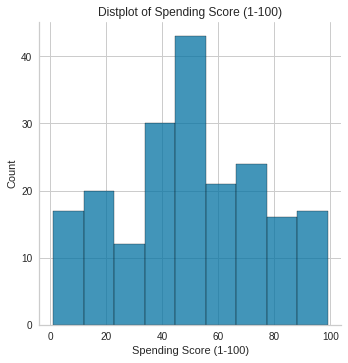

In [ ]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in col:
  plt.figure()
  sns.displot(data=df ,x=i)
  plt.title('Distplot of {}'.format(i))

จากตรงนี้ในกราฟที่ 1 เราจะเห็นว่าลูกค้าส่วนใหญ่เป็นช่วงอายุ 29-35 โดยประมาณ

กราฟที่ 2 ได้บอกกับเราว่าลูกค้าเรามีรายได้ต่อปีที่ประมาณ 40 - 90k ดอลล่าต่อปี

กราฟที่ 3 แสดงให้เราเห็นว่า ลูกค้ามีคะแนนอยู่ที่ประมาณ 35 - 55 คะแนน

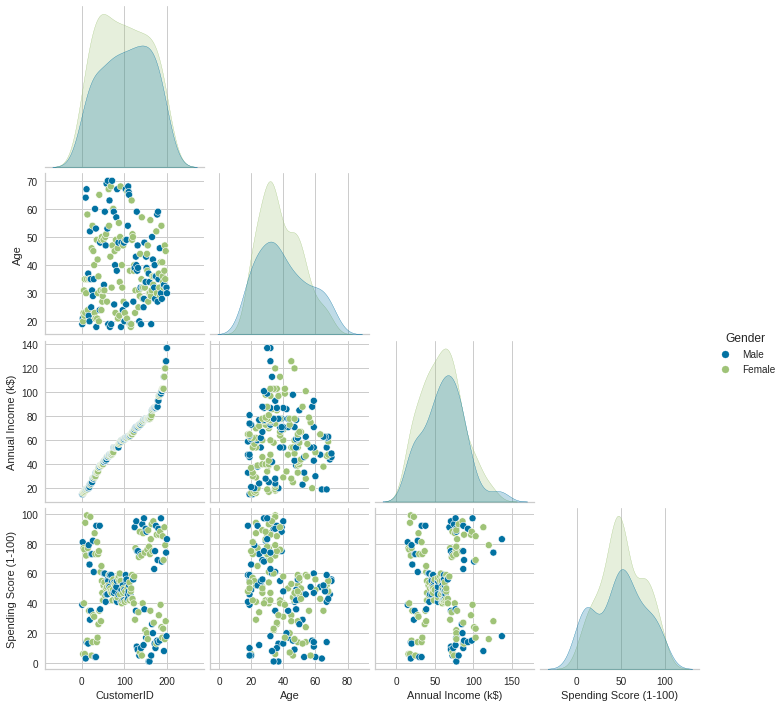

In [ ]:
sns.pairplot(data=df, hue ='Gender' ,corner=True, diag_kind='kde')

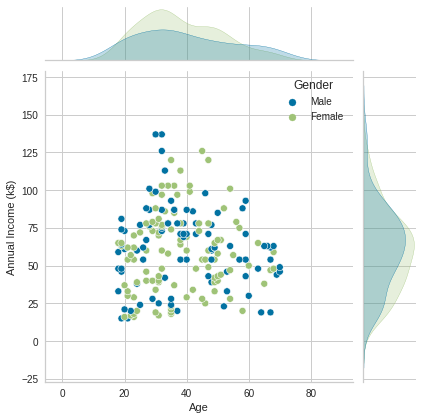

In [ ]:
sns.jointplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')

ภาพนี้แสดงให้เห็นว่าผู้ชายวัย 60 ยังคงเป็นลูกค้าเรา (หรืออาจจะโดยท่านภรรยาใช้ให้มาซื้อของคนเดียว ฮ่าๆ)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
# md = KMeans(n_clusters=5, random_state=42)
# Visual = KElbowVisualizer(md, k=(2,10), timing=True)
# Visual.fit(clus)
# Visual.show()

In [ ]:
X = df[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

model = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y= kmeans.fit_predict(X)

KMeans(n_clusters=5, random_state=0)

In [ ]:
model.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

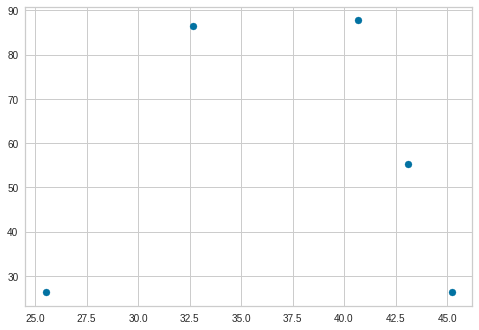

In [ ]:
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2])

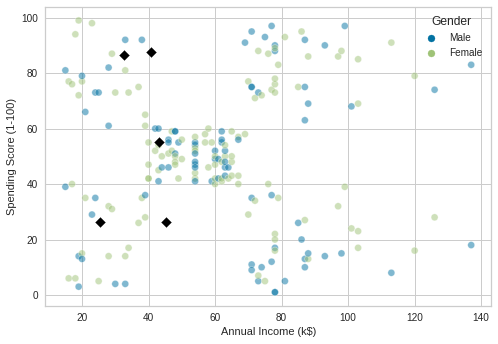

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.5, hue='Gender')
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2], marker='D', color='Black')

In [ ]:
df['Cluster'] = model.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [ ]:
pd.crosstab(df['Gender'], df['Cluster'])

Cluster,0,1,2,3,4
Gender,,,,,
Female,14,21,46,17,14
Male,9,18,33,19,9


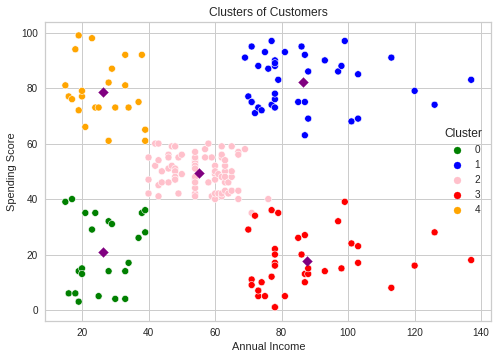

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette=['green', 'blue', 'pink', 'red', 'orange'])
plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,2], marker='D', color='purple')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()